## The horn of Gabriel and introduction to sequences and series

Today we are going to study a shape known as the Horn of Gabriel. 

To construct this shape, we start with the graph, $f(x) = \frac{1}{x}$ and we look only to the right of $x=1$

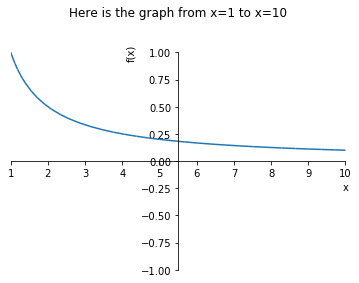

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import *
x, y = symbols('x y')
%matplotlib inline
plot(1/x, xlim = (1,10), ylim = (-1, 1), title='Here is the graph from x=1 to x=10\n\n')

We now revolve this around the x-axis to get a 3d solid, and we want to compare 2 values,
* the volume using the shell method $\pi\int_{1}^{b}(\frac{1}{x})^2dx$
* the surface area $2\pi\int_{1}^{b}{\frac{1}{x}\sqrt{1 + (\frac{1}{x^2})^2}}$

And we want to see what happens when we take the $\lim_{b\to \infty}$

We can do this by using a numeric method to approximate these two values

In [4]:
areaList = []
volumeList = []
function = 1/x
deriv = diff(function, x)

def getVolume(b):
    if b < 1:
        return 0
    else:
        value = pi * integrate(function ** 2, (x,1,b))
        return value

def getArea(b):
    if b < 1:
        return 0
    else:
        value = 2 * pi * integrate(function * sqrt(1 + (deriv**2)), (x,1,b))
        return value

Now we want to use these values and save them into a list
To do this, notice I made a couple of empty lists already.
To add items into a list, we use .append(Value)

In [5]:
print(volumeList)
volumeList.append(getVolume(2))
print(volumeList)
volumeList = [] # I need this part to clear the list after using it, or else I get duplicates possibly

[]
[pi/2]


Lets add many volumes at once

In [6]:
def getManyVolumes(amount):
    myVolumeList = []
    for number in range(amount + 1):
        myVolumeList.append(getVolume(number))
    return myVolumeList
getManyVolumes(10)

[0, 0, pi/2, 2*pi/3, 3*pi/4, 4*pi/5, 5*pi/6, 6*pi/7, 7*pi/8, 8*pi/9, 9*pi/10]

In [7]:
# Finish the fucntion getManyAreas below
def getManyAreas(amount):
    areaList = []
    for number in range(amount + 1):
        areaList.append(getArea(number))
    return areaList
getManyAreas(3)

[0,
 0,
 2*pi*(-sqrt(17)/8 - log(1 + sqrt(2))/2 + sqrt(2)/2 + asinh(4)/2),
 2*pi*(-sqrt(82)/18 - log(1 + sqrt(2))/2 + sqrt(2)/2 + asinh(9)/2)]

Notice that both the volumeList and the areaList are already out partial sums however, our area numbers are not pretty
We can approximate them by saying that ${\frac{1}{x}\sqrt{1 + (\frac{1}{x^2})^2}} > \frac{1}{x}$

In [23]:
def getSimplerArea(b):
    if b < 1:
        print('please use a value greater than 1')
        return 0
    else:
        value = 2 * pi * integrate((1/x), (x,1,b))
        return value

def getManySimplerArea(amount):
    areaList = []
    for number in range(amount + 1):
       areaList.append(getSimplerArea(number))
    return areaList
getManySimplerArea(3)

please use a value greater than 1


[0, 0, 2*pi*log(2), 2*pi*log(3)]

What can we say about these areas and volumes?
Is there a pattern as we go towards $\infty$

### Creating a sequence

In [26]:
# The following function will create a sequence of numbers
# What sequence does this make
def makeSequence(number):
    mySequence = []
    for num in range(1,number+1):
        thing = 1/num
        mySequence.append(thing)
    return mySequence


In [ ]:
makeSequence(4)

In [25]:
# We want to make a partial sum of a series
# to do this, we have to loop through our sequence and add up the values

def partialSum(sequence):
    mySum = 0
    for item in sequence:
        mySum += item
    return mySum
partialSum(makeSequence(8))
mySeq = makeSequence(8)
partialSum(mySeq)

2.7178571428571425

### assignment

make functions to create the sequences and find the partial sums using the partialSum function already made.

$$\sum_{n = 1}^{10}\frac{n - 1}{n+1}$$

In [32]:
def makeSequence(number):
    mySequence = []
    for num in range(1,number+1):
        thing = (num-1)/(num+1)
        mySequence.append(thing)
    return mySequence

In [35]:
makeSequence(10)

[0.0,
 0.3333333333333333,
 0.5,
 0.6,
 0.6666666666666666,
 0.7142857142857143,
 0.75,
 0.7777777777777778,
 0.8,
 0.8181818181818182]

In [38]:

partialSum(makeSequence(10))


5.96024531024531

$$\sum_{n = 1}^{6}\frac{(-1)^n 2^{n-1}}{n!}$$

In [47]:
def makeSequence(number):
    mySequence = []
    for num in range(1,number+1):
        thing =(-1)**num * (2 ** (num-1) )/(math.factorial(num))
        mySequence.append(thing)
    return mySequence

In [48]:
makeSequence(6)

[-1.0,
 1.0,
 -0.6666666666666666,
 0.3333333333333333,
 -0.13333333333333333,
 0.044444444444444446]

In [49]:
partialSum(makeSequence(6))

-0.4222222222222222

$$\sum_{n = 1}^{20}4(\frac{1}{3})^{n-1}$$

In [56]:
def makeSequence(number):
    mySequence = []
    for num in range(1,number+1):
        thing = 4 * (1/3) ** (num-1)
        mySequence.append(thing)
    return mySequence

In [57]:
makeSequence(20)

[4.0,
 1.3333333333333333,
 0.4444444444444444,
 0.1481481481481481,
 0.049382716049382706,
 0.016460905349794233,
 0.005486968449931411,
 0.0018289894833104703,
 0.00060966316110349,
 0.00020322105370116335,
 6.774035123372112e-05,
 2.2580117077907035e-05,
 7.526705692635678e-06,
 2.508901897545226e-06,
 8.363006325150752e-07,
 2.787668775050251e-07,
 9.292229250167501e-08,
 3.097409750055834e-08,
 1.0324699166852778e-08,
 3.441566388950926e-09]

In [58]:
partialSum(makeSequence(20))

5.9999999982792165

$$\sum_{n = 1}^{\infty}(\frac{1}{3})^{n-1}$$

In [62]:
def makeSequence(number):
    mySequence = []
    for num in range(1,number+1):
        thing =(1/3) ** (num -1)
        mySequence.append(thing)
    return mySequence

In [ ]:
makeSequence(20)

In [64]:
limit(partialSum(makeSequence(20)),x,oo)

1.49999999956980